In [1]:
def hide_code_in_slideshow():   
    from IPython import display
    import binascii
    import os
    uid = binascii.hexlify(os.urandom(8)).decode()    
    html = """<div id="%s"></div>
    <script type="text/javascript">
        $(function(){
            var p = $("#%s");
            if (p.length==0) return;
            while (!p.hasClass("cell")) {
                p=p.parent();
                if (p.prop("tagName") =="body") return;
            }
            var cell = p;
            cell.find(".input").addClass("hide-in-slideshow")
        });
    </script>""" % (uid, uid)
    display.display_html(html, raw=True)

hide_code_in_slideshow()  

In [2]:
#!pip install scikit-fuzzy

%matplotlib inline

import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# Control Difuso

Es un sistema de control que esta basado en la lógica difusa. 

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/e/ec/Lotfi_Zadeh_Berkeley_c.jpg/800px-Lotfi_Zadeh_Berkeley_c.jpg" width="200px" />

[Lofti A. Zadeh](https://es.wikipedia.org/wiki/Lotfi_A._Zadeh) desarrollo la lógica difusa. 

# ¿Qué tan mojada esta la ropa?

## Lógica Booleana

- Mojada (_Verdadero_)
- Seca (_Falso_)

## Lógica Difusa

- Parcialmente Mojada (0.7)
- Parcialmente Seca (0.3)

# Beneficios del control difuso

- No requiere conocer el modelo dinámico del sistema a controlar. Por tanto,
    - No requiere identificar el sistema
    - No necesita aproximar el modelo
    - No necesita linealizarlo. 
- **Pero,**
    - No se conoce bien el sistema

In [3]:
# https://www.irjet.net/archives/V2/i8/IRJET-V2I8104.pdf
# https://www.upt.ro/img/files/alegeri_2020/csud/5_Cinci_lucrari_stiintifice_in_extenso_2020-2024.pdf

# Aplicaciones del control difuso 

# Estructura de un controlador difuso

![](control-loop.png)

Tomada de [_A survey on industrial applications of fuzzy control_](https://doi.org/10.1016/j.compind.2010.10.001)

# Etapas dentro de un controlador difuso

- Valores de Entrada (_crisp inputs_)
- **Módulo de Fusificación**
- Entradas difusas
- **Módulo de Inferencia**
- Conclusiones difusas
- **Módulo de Defusificación**
- Valores de Salida (_crisp outputs_)

# Variables lingüísticas / Funciones de membresia



# Reglas de Control 

Dado un sistema con dos entradas $X$ y $Y$ y una salida $Z$, podemos definir las reglas de control en el modulo de inferencia así:

- Si $X$ es $A_1$ y $Y$ es $B_1$, entonces $Z$ es $C_1$
- Si $X$ es $A_2$ y $Y$ es $B_2$, entonces $Z$ es $C_2$
- Si $X$ es $A_3$ y $Y$ es $B_3$, entonces $Z$ es $C_3$

# Modulo de Defusificación

Para la defusificación se pueden usar diferentes métodos:

- Centroide: considera a la función como una función de distribución de masa y busca su centroide. 
- Bisectriz: divide el area bajo la función en dos regiones iguales.
- Máximo central (MOM _mean of maximum_): toma el promedio de los máximos.
- Máximo más grande (LOM _largest of maximum_): toma el máximo más grande. 
- Máximo más pequeño (SOM _smallest of maximum_): toma el máximo más pequeño.

[![](defusificacion.png)](https://www.slideserve.com/erv/hedge)

# Modulo de inferencia 

Existen diferentes métodos de inferencia, entre ellos: 

- Mamdani 

[![](mamdani.jpg)](http://www.dma.fi.upm.es/recursos/aplicaciones/logica_borrosa/web/fuzzy_inferencia/mamdanir_en.htm)

# Ejemplo : Impresora

Realicemos el control de posición de la impresora via el voltaje del motor con un controlador difuso.

![](printer.png)

- Variable de entrada : Error de posición
- Variable de salida : Voltaje del motor

# Sistema de control

![](control-loop.png)

# Reglas de control

- Si el error es NG, entonces el voltaje es NG (negativo grande)
- Si el error es NP, entonces el voltaje es NP (negativo pequeño)
- Si el error es C, entonces el voltaje es C (cero)
- Si el error es PP, entonces el voltaje es PP (positivo pequeño)
- Si el error es PG, entonces el voltaje es PG (positivo grande)


# En MATLAB 

Usaremos la aplicación _fuzzy logic designer_, debemos tener instalado el _Fuzzy Logic Toolbox_

![](fuzzy-logic-toolbox.png)

# Fuzzy logic designer

Esta es la ventana inicial, donde definiremos la variable de entrada como el error y la variable de salida como el voltaje. 

![](fuzzy-logic-designer.png)

# Funciones de membresia

Cambiar los valores de error en posición

- ENG = (Range -20, 20, Type: Trapmf, Params: -20 -20 -10 – 5)
- ENP = (Range -20, 20, Type: Trimf, Params: -10 -5 -0 )
- EC = (Range -20, 20, Type: Trimf, Params:  -5 -0  5 )
- EPP = (Range -20, 20, Type: Trimf, Params:  0  5  10 )
- EPG =   (Range -20, 20, Type: Trápmf, Params:  5  10  20 20 )


# Funciones de membresia

Cambiar los valores de voltaje

- VNG = (Range -12, 12, Type: Trapmf, Params: -12 -12 -6 – 3)
- VNP = (Range -12, 12, Type: Trimf, Params: -6 -3 -0 )
- VC = (Range -12, 12, Type: Trimf, Params:  -3 -0  3 )
- VPP = (Range -12, 12, Type: Trimf, Params:  0  3  6 )
- VPG =   (Range -12, 12, Type: Trapmf, Params:  3 6 12 12 )


# Añadir reglas de control 

- Vamos a edit y buscamos el término _Rules_.
- Emparejamos las entradas y salidas correspondientes con el bóton "Add rule"
- Cuando hayamos terminado cerramos la ventana.
- Seleccionamos el metodo de fusificación. 
- Exportamos las reglas. 

# Visualización de las reglas

![](fuzzy-logic-designer-rules.png)

# Visualización de la superficie de control

![](fuzzy-logic-designer-surface.png)

# Archivos para Matlab

- [Controlador difuso](impresora.fis)
- [Simulink](impresora.slx)

Aunque la lógica difusa se había estado estudiando desde aproximadamente
Los años 1920,Lofti Zadeh fue quien oficialmente introdujo el tema en 1965.
El observó que los computadores  no les iba bien manejando datos subjetivos
Tales que si podían ser manejados por humanos.

# Lógica difusa

¿Que tan mojada esta la ropa? 

- Lógica clásica: Verdadero (mojado), Falso (seco)

$$M \in \{0,1\}$$

- Lógica difusa: Parcialmente verdarero, parcialmente falso.

    $$M \in [0,1]$$
    
    Muy seca, poco seca, poco mojada, muy mojada

# Ejemplo calor

**¿Está el té caliente?**

- En sistemas booleanos, tenemos valores absolutos:

$$\array{\text{Si}&\text{No}}$$

- En sistemas difusos, tenemos valores que son parcialmente verdaderos y parcialmente falsos

$$\array{\text{Muy Caliente}&\text{Caliente}&\text{Frío}&\text{Muy Frío}}$$

# Ventajas del control difuso

No requiere conocer el modelo dinámico del sistema a controlar. Por tanto,
- El control difuso no requiere identificar el sistema
- Ni necesita aproximar el modelo
- Ni necesita linealizarlo
Facilita el diseño del controlador

Pero necesita conocer las reglas lingüísticas de control de un experto. Cuando no se conoce el modelo se usa:
- Control PID (una entrada y una salida)
- Control Difuso (múltiples entradas y salidas)


# Función de membresia

La función de membresia fue introducida por Lofti A. Zaden en 1965 en el artículo _"fuzzy sets"_. Las funciones de membresia caracterizan la caracteristica difusa. 

A cada valor difuso se le asigna un valor numérico entre 0 y 1.

# Conjuntos

En conjuntos clásicos los elementos pueden ser o no-ser parte de un conjunto. 

Sea $A$ un conjunto, y $\chi$ la función de membresia a dicho conjunto:

$$\chi_A(x) = \left\{\array{0&x\in A\\1&x\notin A}\right\}$$

Para un ejemplo de alturas $A= \{165,166,167,\ldots\}$

## Cardinalidad

La cardinalidad de un conjunto $S$ es denotado por $|S|$, y es el numero de elementos del conjunto. Este número también se conoce como el número cardinal. 

# Conjunto difuso

Los conjuntos difusos pueden ser considerados una extensión de los conjuntos clásicos. 

**En lógica difusa un elemento puede ser parcialmente miembro de un conjunto.**

La función de membresia para un conjunto difuso se representa por $\mu_A(x)$

# Operaciones de conjuntos clásicos 

$$A=\{1,2,3,4,5\} \quad B=\{4,5,6,7,8\}$$


- Union $A \cup B = \{x | x \in A \;\text{o}\; x \in B \}$

$$A\cup B = \{1,2,3,4,5,6,7,8\}$$

- Intersección $A \cap B = \{x | x \in A \;\text{y}\; x \in B \}$

$$A\cap B = \{4,5\}$$

- Complemento $A'= \{x|x\notin A, x\in X\}$

- Diferencia $A|B = \{x|x\in A \;\text{y}\; x\notin B\}$

# Operaciones de conjuntos difusos

- Union (máximo)

$$\mu_{\tilde{A}\cup\tilde{B}} = \mu_{\tilde{A}}\cup\mu_{\tilde{B}} \quad y \in u$$

In [4]:
%matplotlib inline

In [5]:
import tkinter
import matplotlib
import matplotlib.pyplot as plt
# matplotlib.use('TkAgg')

C:\Python39\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


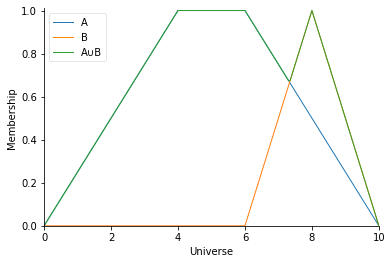

In [6]:
union = ctrl.Antecedent(np.arange(0, 10.05, 0.05), 'Universe')
MFA = fuzz.trapmf(union.universe, [0, 4, 6, 10])
MFB = fuzz.trimf(union.universe, [6, 8, 10])
union['A'] = MFA
union['B'] = MFB
_,union['A∪B'] = fuzz.fuzzymath.fuzzy_or(union.universe,MFA,union.universe,MFB)
union.view()

# La función .view() necesita instalar un backend que permita graficar
# 
# pip install pyqt5
#
# https://stackoverflow.com/questions/56656777/userwarning-matplotlib-is-currently-using-agg-which-is-a-non-gui-backend-so

# Operaciones de conjuntos difusos

- Intersección (mínimo)

$$\mu_{\tilde{A}\cap\tilde{B}} = \mu_{\tilde{A}}\cap\mu_{\tilde{B}} \quad y \in u$$

C:\Python39\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


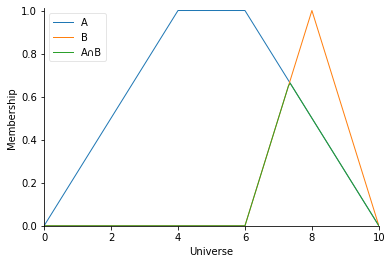

In [7]:
interseccion = ctrl.Antecedent(np.arange(0, 10.05, 0.05), 'Universe')
interseccion['A'] = MFA
interseccion['B'] = MFB
_,interseccion['A∩B'] = fuzz.fuzzymath.fuzzy_and(interseccion.universe,MFA,interseccion.universe,MFB)
interseccion.view()

# Operaciones de conjuntos difusos

- Complemento 

$$\bar{\mu_{\tilde{A}}} = 1-\mu_{\tilde{A}} \quad y \in u$$

C:\Python39\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


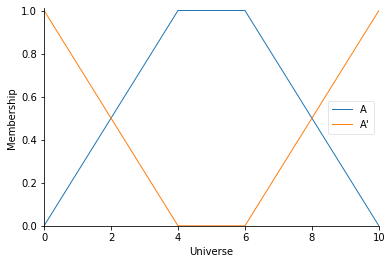

In [8]:
complemento = ctrl.Antecedent(np.arange(0, 10.05, 0.05), 'Universe')
complemento['A'] = MFA
complemento["A'"] = fuzz.fuzzymath.fuzzy_not(MFA)
complemento.view()

# Operaciones de conjuntos difusos

- Diferencia 

$$\mu_{\tilde{A}|\tilde{B}} = \mu_{\tilde{A}}\cap\bar{\mu_{\tilde{B}}} \quad y \in u$$

C:\Python39\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


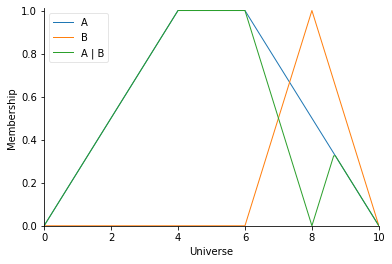

In [9]:
diferencia = ctrl.Antecedent(np.arange(0, 10.05, 0.05), 'Universe')
diferencia['A'] = MFA
diferencia['B'] = MFB
_,diferencia['A | B'] = fuzz.fuzzymath.fuzzy_and(diferencia.universe,MFA,diferencia.universe,fuzz.fuzzymath.fuzzy_not(MFB))
diferencia.view()

# Propiedades de los conjuntos

- Commutatividad

$$A\cup B = B\cup A \qquad A\cap B = B\cap A$$

- Asociatividad

$$A\cup (B\cup C) = (A\cup B)\cup C \qquad A\cap (B\cap C) = (A\cap B)\cap C$$

- Distributividad

$$A\cup (B\cap C) = (A\cup B)\cap (A \cup C) \qquad A\cap (B\cup C) = (A\cap B)\cup (A \cap C)$$

- Idempotencia

$$A\cup A =  A \qquad A\cap A = A$$

- Identidad

$$A\cup 0 = A \qquad A\cap 0 = 0 \qquad A\cap X =A \qquad A\cup X = X$$

- Transitividad

$$\text{si } A \subseteq B \;\text{y}\; B\subseteq C \;\text{, entonces}\; A \subseteq C$$

- Involución
- Teorema de Morgan

# Composición de relaciones difusas

$$T = R \textbf{ o } S $$

Donde $R$ es la relación de universos $X$ y $Y$ y $S$ es la relación de universos $Y$ y $Z$, luego $T$ es la relación de universos $X$ y $Z$.

Dos tipo de composiciones existen:

- Composición MAX-MIN :

$$\mu_{R \textbf{ o } S}= \max_{y\in Y}\left[\min\left(\mu_R(x,y),\mu_S(y,z)\right)\right]$$

- Composición MAX-Producto : 

$$\mu_{R \textbf{ o } S}= \max_{y\in Y}\left[\mu_R(x,y)\cdot\mu_S(y,z)\right]$$

In [10]:
def MaxMinCompo(R,S):
    T = np.zeros([R.shape[0],S.shape[1]])
    for xi in range(R.shape[0]):
        for zi in range(S.shape[1]):
            T[xi,zi] = np.max(np.minimum(R[xi,:],S[:,zi].T))
    return T

def MaxProdCompo(R,S):
    T = np.zeros([R.shape[0],S.shape[1]])
    for xi in range(R.shape[0]):
        for zi in range(S.shape[1]):
            T[xi,zi] = np.max(np.multiply(R[xi,:],S[:,zi].T))
    return T

In [11]:
print("Ejemplo de Composición\n")

R = np.matrix([[0.5,0.1],[0.2,0.9],[0.8,0.6]])
S = np.matrix([[0.6,0.4,0.7],[0.5,0.8,0.9]])
print("R =\n",R)
print("S =\n",S)
T = MaxMinCompo(R,S)
print("T = {max-min}\n",T)
T = MaxProdCompo(R,S)
print("T = {max-prod}\n",T)

Ejemplo de Composición

R =
 [[0.5 0.1]
 [0.2 0.9]
 [0.8 0.6]]
S =
 [[0.6 0.4 0.7]
 [0.5 0.8 0.9]]
T = {max-min}
 [[0.5 0.4 0.5]
 [0.5 0.8 0.9]
 [0.6 0.6 0.7]]
T = {max-prod}
 [[0.3  0.2  0.35]
 [0.45 0.72 0.81]
 [0.48 0.48 0.56]]


In [12]:
print("Ejemplo de Composición\n")

R = np.matrix([[0.3,0.9,0.2],[0.6,0.5,0]])
S = np.matrix([[1,0.6],[0.4,0.1],[0.7,0]])
print("R =\n",R)
print("S =\n",S)
T = MaxMinCompo(R,S)
print("T = {max-min}\n",T)
T = MaxProdCompo(R,S)
print("T = {max-prod}\n",T)

Ejemplo de Composición

R =
 [[0.3 0.9 0.2]
 [0.6 0.5 0. ]]
S =
 [[1.  0.6]
 [0.4 0.1]
 [0.7 0. ]]
T = {max-min}
 [[0.4 0.3]
 [0.6 0.6]]
T = {max-prod}
 [[0.36 0.18]
 [0.6  0.36]]


# Propiedades de las relaciones 

- **Reflexividad**: Cuando una relación es reflexiva, cada nodo en el grafo genera una conexión con sigo mismo.

$$R = \left\{(x,x)\right\} \qquad\text{ , } x\in R$$

- **Simetria**: Una relación es simétrica cuando en le grafo, para cada conexión del nodo $i$ hacia el nodo $j$, hay una conexión apuntando en la direción opuesta, es decir, del nodo $j$ al nodo $i$. 

$$(x,y)\in R \qquad\to\qquad (y,x)\in R$$

- **Transitividad**: Una relación es transitiva cuando para cada par de conexiones en el grafo, una apuntando del nodo $i$ al nodo $j$ y otra del nodo $j$ al nodo $k$, existe tambien una conexión del nodo $i$ al nodo $k$.